# 7.2 Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Company wants to know-
- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## Importing and Understanding data

In [1]:
import pandas as pd

housing = pd.read_csv("Housing.csv")

In [2]:
#First 5 rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preparation

Many columns in this dataframe, has categorical data like yes/no, furnished/semi-furnished/unfurnished.
So these values can be converted into numeric values as yes = 1, no = 0 etc.

In [3]:
print(housing['mainroad'].value_counts(), '\n')
print(housing['furnishingstatus'].value_counts())

yes    468
no      77
Name: mainroad, dtype: int64 

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [4]:
# https://pbpython.com/categorical-encoding.html

## Approch-1 Find and replace 
# This approach may only work in certain scenarios it is a very useful demonstration of 
# how to convert text values to numeric when there is an “easy” human interpretation of the data. 
# This concept is also useful for more general data cleanup.

housing['mainroad'].replace({'yes':1, 'no':0}, inplace=True)
housing['guestroom'].replace({'yes':1, 'no':0}, inplace=True)
housing['basement'].replace({'yes':1, 'no':0}, inplace=True)
housing['hotwaterheating'].replace({'yes':1, 'no':0}, inplace=True)
housing['airconditioning'].replace({'yes':1, 'no':0}, inplace=True)
housing['prefarea'].replace({'yes':1, 'no':0}, inplace=True)

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Now, we have converted yes,no values into 1,0  respectively. Remaining column is furnishingstatus. It has 3 values as:
semi-furnished, unfurnished, furnished. We can replace these values with 1,0,2 respectively. But, this has disadvantage as numeric values can be "misinterpreted" by the algorithms. So there is also another technique called as **One Hot Encoding**. In this approach, despite the different names, **the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column.** This has the benefit of not weighting a value improperly but does have the **downside of adding more columns to the data set.**

Pandas supports this feature using **get_dummies**. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

In [6]:
# using One Hot Encoding on column furnishingstatus

status = pd.get_dummies(housing['furnishingstatus'])
print(type(status))
status.head()

<class 'pandas.core.frame.DataFrame'>


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


As each row contains only 1 value for 3 columns, we can drop first column and guess its value based on other 2 columns.
Sum for values in row is always 1.

In [7]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [8]:
# Add status dataframe into housing dataframe
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [9]:
# After addition of extra columns, we dont need furnishingstatus column. So we can drop it
housing.drop(["furnishingstatus"], inplace=True, axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Now data is prepared. But there is an extra step. We should always look if we can add extra variables also. Later we can remove
those variables if they are not good / causing any effect on multiple linear regression. Such variables are called 
as **Derived Variables**. 

For this dataframe, we can add Area Per Bedroom and Bathrooms per Bedroom derived variables

In [10]:
housing['areaPerBedroom'] = housing['area']/housing['bedrooms']
housing['bathBedRatio'] = housing['bathrooms']/housing['bedrooms']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaPerBedroom,bathBedRatio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the features

By looking at data values, some values are too high and other values are too low. 
Equation formed will be as 
y = m1 * area + m2 * bedrooms + ... + m15 * bathBedRatio
y = m1 * 7420 + m2 * 4 + .... + m15 * 0.50
Due to high values, area (7420) will dominate whole result. Due to this we may end up with very high values for coefficients.

So we need to rescale the variables so that they have a comparable scale.
There are 2 ways of 

- Normalizaton (min-max scaling)
- Standardisation (mean-0, sigma-1)

For this case, we will try normalization

In [11]:
import numpy as np

# Define a normalization function
def normalize(x):
    return ((x - np.min(x))/(max(x) - min(x)))

# Apply normalize to all columns in dataframe
housing = housing.apply(normalize)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaPerBedroom,bathBedRatio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [12]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaPerBedroom', 'bathBedRatio'],
      dtype='object')

In [13]:
# Putting feature varibles to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaPerBedroom', 'bathBedRatio']]

# Putting response varible to y
y = housing[['price']]

In [14]:
# Splitting data into Train and Test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
### Build a linear model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lm_l = sm.OLS(y_train, X_train_sm).fit()

print("OLS Summary - 1")
lm_l.summary()

OLS Summary - 1


C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           4.56e-82
Time:                        19:38:09   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059      1.029      0.304      -0.055       0.176
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaPerBedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bathBedRatio        0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking VIF

One problem can exist in data, feature variables can be correlated with each other. Then we can use correlation matrix and check heatmap for correlation. But there comes another problem. What if more than 1 columns are highly correlated?

**e.g.**
- x1 = 3.5 * x2  ... only 2 variables are correlated
- x1 + 2 * x2 = 3 * x3 ... 3 varaibles are correlated and correlation matrix can work only with 2 varibles

This problem is also known as **Multi-Colinearity problem**. In order to solve this problem we will use **VIF (Variance Inflation Factor)**.

**VIF(X1) = 1 / (1- R^2)**

VIF Calculation Process:
- We have some independent columns, x1, x2, x3, x4 and a target as y.
- From these variables, we will take out x1 and treat it as response varible and x2, x3 ,x4 as independent varibles.
- With these variables, we will build a model and calculate R-Square (R^2)
- If this R^2 is very high, then definitely x1 is correlated with x2, x3, x4.
- Simlar process is also applied to all other variables
- If R^2 is high, VIF is also high
- Higher the VIF, higher multi-colinearity

Dos and Dont's

- If you have higher VIF and lower p-value, do not rush to remove this variable
- If higher VIF value and Higher p-value (> 0.05), you can remove that variable

In [16]:
# UDF to calculate VIf values
def calculate_VIF(input_data, dependent_cols):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_vars = input_data.drop([dependent_cols], axis=1)
    x_vars_names = x_vars.columns
    
    for i in range(0, x_vars_names.shape[0]):
        y = x_vars[x_vars_names[i]]
        x = x_vars[x_vars_names.drop(x_vars_names[i])]
        rsq = sm.OLS(y, x).fit().rsquared
        
        vif = round(1/(1-rsq), 2)
        vif_df.loc[i] = [x_vars_names[i], vif]
        
    return vif_df.sort_values(by='VIF', axis=0, ascending=False, inplace=False)

#Calculating VIF value for price
calculate_VIF(housing, 'price')

,Var,VIF
13,areaPerBedroom,68.71
0,area,57.52
14,bathBedRatio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


## Analysis using VIF and P-Values 

From OLS Summary 1:
- P-value for semi-furnished is 0.946 but vif 2.61. Its not that bad as compared with other variables. We can wait for it.
- P-value for bathBedRatio is 0.674 and vif 29.25. So as both are high, remove this column.

## Dropping variable and Updating model

In [17]:
# Drop highly correlated varibles and insignificant variables
X_train = X_train_sm.drop('bathBedRatio', 1)

print("OLS_Summary : 2")
# Create second filtered model
sm.OLS(y_train, X_train).fit().summary()

OLS_Summary : 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           6.46e-83
Time:                        19:38:09   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036      2.239      0.026       0.010       0.150
area                0.5483      0.119      4.622      0.000       0.315       0.782
bedrooms           -0.0845      0.070     -1.209      0.227      -0.222       0.053
bathrooms           0.2850      0.033      8.686      0.000       0.220       0.350
stories             0.1022      0.019      5.301      0.000       0.064       0.140
mainroad            0.0509      0.014      3.568      0.000       0.023       0.079
guestroom           0.0265      0.014      1.941      0.053      -0.000       0.053
basement            0.0210      0.011      1.898      0.058      -0.001       0.043
hotwaterheating     0.0866      0.021      4.031      0.000       0.044       0.129
airconditioning     0.0662      0.011      5.871      0.000       0.044       0.088
parking             0.0563      0.018      3.119      0.002       0.021       0.092
prefarea            0.0563      0.012      4.760      0.000       0.033       0.079
semi-furnished     -0.0009      0.012     -0.077      0.939      -0.024       0.022
unfurnished        -0.0323      0.013     -2.554      0.011      -0.057      -0.007
areaPerBedroom     -0.2840      0.129     -2.208      0.028      -0.537      -0.031
==============================================================================
Omnibus:                       88.466   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.794
Skew:                           1.034   Prob(JB):                     3.91e-62
Kurtosis:                       6.679   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Dropping bathBedRatio and calculating VIF value
calculate_VIF(housing.drop(['bathBedRatio'], axis=1), "price")

,Var,VIF
0,area,20.72
13,areaPerBedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


From OLS Summary 2:
- P-value for bedrooms is 0.227 and  vif 10.03. So as both are high, remove this column.

In [19]:
X_train = X_train.drop('bedrooms', 1)

print("OLS_Summary :3")
sm.OLS(y_train, X_train).fit().summary()

OLS_Summary :3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.66e-83
Time:                        19:38:09   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018      2.362      0.019       0.007       0.078
area                0.4326      0.070      6.164      0.000       0.295       0.571
bathrooms           0.2814      0.033      8.606      0.000       0.217       0.346
stories             0.1005      0.019      5.224      0.000       0.063       0.138
mainroad            0.0515      0.014      3.611      0.000       0.023       0.080
guestroom           0.0285      0.014      2.101      0.036       0.002       0.055
basement            0.0201      0.011      1.822      0.069      -0.002       0.042
hotwaterheating     0.0850      0.021      3.963      0.000       0.043       0.127
airconditioning     0.0667      0.011      5.909      0.000       0.044       0.089
parking             0.0573      0.018      3.175      0.002       0.022       0.093
prefarea            0.0576      0.012      4.895      0.000       0.034       0.081
semi-furnished   9.202e-06      0.012      0.001      0.999      -0.023       0.023
unfurnished        -0.0313      0.013     -2.478      0.014      -0.056      -0.006
areaPerBedroom     -0.1516      0.068     -2.242      0.026      -0.285      -0.019
==============================================================================
Omnibus:                       88.924   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.140
Skew:                           1.041   Prob(JB):                     3.29e-62
Kurtosis:                       6.674   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Calculate VIF values dropping bathBedRatio and bedrooms

calculate_VIF(housing.drop(['bathBedRatio', 'bedrooms'], 1), 'price')

,Var,VIF
0,area,14.98
12,areaPerBedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


From OLS Summary 3:
- P-value for areaPerBedroom is 0.026 and  vif 13.88. So as both are high, remove this column.

In [21]:
# Dropping areaPerBedroom and recalculating model
X_train = X_train.drop(['areaPerBedroom'], 1)

print("OLS_Summary : 4")
sm.OLS(y_train, X_train).fit().summary()

OLS_Summary : 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.35e-83
Time:                        19:38:09   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017      1.795      0.074      -0.003       0.066
area                0.3008      0.039      7.799      0.000       0.225       0.377
bathrooms           0.2947      0.032      9.114      0.000       0.231       0.358
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Calculating VIF values with areaPerBedroom removed along with other
calculate_VIF(housing.drop(['bedrooms', 'bathBedRatio', 'areaPerBedroom'], 1), 'price')

,Var,VIF
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


From OLS Summary 4:
- P-value for semi-furnished is 0.947 and  vif 2.0. So P-value is still high, remove this column.

In [23]:
# Dropping areaPerBedroom and recalculating model
X_train = X_train.drop(['semi-furnished'], 1)

print("OLS_Summary : 5")
sm.OLS(y_train, X_train).fit().summary()

OLS_Summary : 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.73e-84
Time:                        19:38:10   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015      2.142      0.033       0.003       0.061
area                0.3006      0.038      7.851      0.000       0.225       0.376
bathrooms           0.2947      0.032      9.132      0.000       0.231       0.358
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Calculating VIF values with semi-furnished removed along with other
calculate_VIF(housing.drop(['bedrooms', 'bathBedRatio', 'areaPerBedroom', 'semi-furnished'], 1), 'price')

,Var,VIF
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


From OLS Summary 5:

- P-value for basement is 0.030 and vif 1.86. So P-value is still high, remove this column.

In [25]:
# Dropping areaPerBedroom and recalculating model
X_train = X_train.drop(['basement'], 1)

print("OLS_Summary : 6")
lm_6 = sm.OLS(y_train, X_train).fit()
lm_6.summary()

OLS_Summary : 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           3.13e-84
Time:                        19:38:10   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015      2.670      0.008       0.010       0.068
area                0.2990      0.038      7.772      0.000       0.223       0.375
bathrooms           0.3028      0.032      9.397      0.000       0.239       0.366
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Calculating VIF values with semi-furnished removed along with other
calculate_VIF(housing.drop(['bedrooms', 'bathBedRatio', 'areaPerBedroom', 'semi-furnished', 'basement'], 1), 'price')

,Var,VIF
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


## Make Predictions Using final Model

In [27]:
# Adding constant varibale to X_test
X_test_m6 = sm.add_constant(X_test)

# Dropping columns
X_test_m6 = X_test_m6.drop(['bedrooms', 'bathBedRatio', 'areaPerBedroom', 'semi-furnished', 'basement'], 1)

y_pred_m6 = lm_6.predict(X_test_m6)

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Model Evaluation

Text(0, 0.5, 'Price')

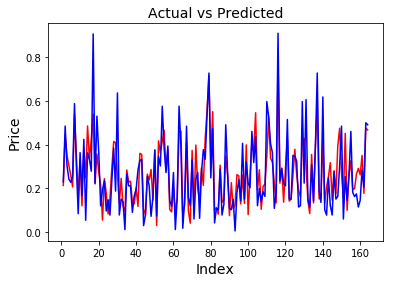

In [28]:
import matplotlib.pyplot as plt

# Actual vs Predicted
c = [i for i in range(1, 165, 1)]
fig = plt.figure()
plt.plot(c, y_pred_m6, color="red")
plt.plot(c, y_test, color="blue")
plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)

Text(0, 0.5, 'y_pred_m6')

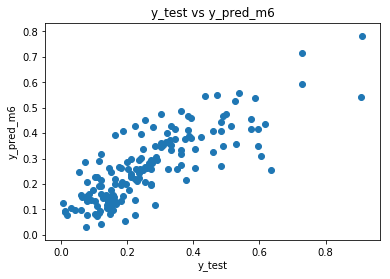

In [29]:
# Scatter plot for actual and predicted values
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
plt.title("y_test vs y_pred_m6")
plt.xlabel("y_test")
plt.ylabel("y_pred_m6")


Text(0, 0.5, 'y_test-y_pred_m6 ')

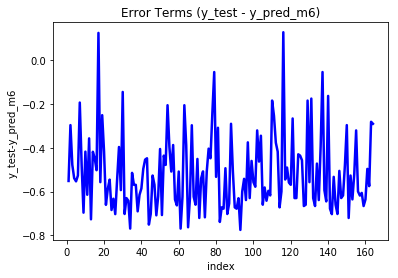

In [32]:
# Plotting Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c, y_test-y_pred_m6[1], color="blue", linewidth=2.5, linestyle="-")
plt.title("Error Terms (y_test - y_pred_m6)")
plt.xlabel("index")
plt.ylabel("y_test-y_pred_m6 ")


Text(0, 0.5, 'Index')

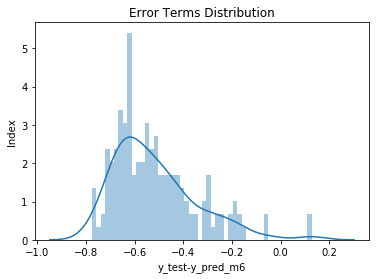

In [34]:
import seaborn as sns
# Plotting Error terms to understand distribution
fig = plt.figure()
sns.distplot(( y_test-y_pred_m6[1]), bins=50)
plt.title("Error Terms Distribution")
plt.xlabel("y_test-y_pred_m6")
plt.ylabel("Index")

In [36]:
import numpy as np
# Calculate Root Mean Squared Error
from sklearn import metrics
print("RMSE::", np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

RMSE:: 0.10001092336807833
